# Homework Assignment 3
## Author: Dat Tri Tat
## ID: 015660840
## Date: 10/28/2024





# Q 1




**Forward Pass**

Inputs to First Hidden Layer
$$ s_{1}^{(1)} = 1 * 0.3 + x * 0.1 = 0.3 + 0.5 = 0.5 $$
$$ s_{2}^{(1)} = 1 * 0.4 + x * 0.2 = 0.4 + 0.4 = 0.8 $$

Activation of Hidden Layer 1
$$ x_{1}^{(1)} = tanh(s_{1}^{(1)}) = tanh(0.5) = 0.46$$
$$ x_{2}^{(1)} = tanh(s_{2}^{(1)}) = tanh(0.8) = 0.66$$


Input to Second Hidden Layer
$$ s^{(2)} = 1 * 0..4 + x_{1}^{(1)} * 0.2 + x_{2}^{(1)} * 0.1 = 0.55$$
Network Output
$$ x^{(2)} = tanh(s^{(2)}) = 0.50$$

**Backward Pass**
$$ e = 1/2(y-x^{(2)})^{2} $$

Gradient output
$$ δ^{(2)} = -(y-x^{(2)}) * (1 - tanh^{2}(s^{(2)})) = −1.109$$

Gradients at First Hidden Layer
$$ δ_{1}^{(1)} = δ^{(2)} * 0.2 ( 1- tanh^{2}(s_{1}^{(1)}))  = −0.174$$
$$ δ_{2}^{(1)} = δ^{(2)} * 0.1 ( 1- tanh^{2}(s_{2}^{(1)}))  = −0.062$$

Gradients w.r.t. Weights From Input to First Hidden Layer
$$ \frac{∂e}{w_{1,1}} = δ_{(1)}^{1} * 1 = −0.174$$
$$ \frac{∂e}{w_{1,2}} = δ_{(1)}^{1} * x = −0.349$$
$$ \frac{∂e}{w_{2,1}} = δ_{(1)}^{2} * 1 = −0.062$$
$$ \frac{∂e}{w_{2,2}} = δ_{(1)}^{2} * x = −0.124$$

Gradients w.r.t. Weights First Hidden Layer to Output
$$ \frac{∂e}{w_{3,1}} = δ^{(2)} * 1 = −1.109$$
$$ \frac{∂e}{w_{3,2}} = δ^{(2)} * x_{1}^{(1)} = −0.512$$
$$ \frac{∂e}{w_{3,3}} = δ^{(2)} * x_{2}^{(1)} = −0.736$$



# Q 2 Implement your own neural network

In [1]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def initialize_weights(d):
    np.random.seed(42)
    W1 = np.random.randn(d[1], d[0] + 1)  # Include bias term
    W2 = np.random.randn(d[2], d[1] + 1)  # Include bias term
    return [W1, W2]

def forward(W, x):
    current_input = np.append(x, 1)  # Add bias for the input layer
    activations = [x]
    preactivations = []

    # Iterate through each layer's weights
    for w in W:
        z = np.dot(w, current_input)
        preactivations.append(z)
        a = tanh(z)
        current_input = np.append(a, 1)  # add bias for the next layer input
        activations.append(a)

    for i in range(len(preactivations)):
        print(f"z{i+1} (Layer {i+1} pre-activation):", preactivations[i])
        print(f"a{i+1} (Layer {i+1} activation):", activations[i+1])

    # Return activations and preactivations
    return activations, preactivations

def backward(W, A, Z, y):
    L = len(W)  # Number of layers
    gradients = [None] * L
    # output error
    delta = (A[-1] - y) * tanh_derivative(Z[-1])
    gradients[-1] = np.outer(delta, np.append(A[-2], 1))
    # Backpropagate through each layer
    for l in reversed(range(L - 1)):
        delta = np.dot(W[l+1].T[:-1], delta) * tanh_derivative(Z[l])
        gradients[l] = np.outer(delta, np.append(A[l], 1))
    return gradients

#input, hidden, and output layers
d = [2, 2, 1]

# Initialize weights
W = initialize_weights(d)

#input and target output
x = np.array([1, 2])
y = np.array([2])

A, Z = forward(W, x)
gradients = backward(W, A, Z, y)

# Output activation of the network and the computed gradients
print("Output of the network:", A[-1])
for i, grad in enumerate(gradients, 1):
    print(f"Gradient for W{i}:\n", grad)


z1 (Layer 1 pre-activation): [0.86787409 0.82058615]
a1 (Layer 1 activation): [0.7002924  0.67538878]
z2 (Layer 2 pre-activation): [1.15475315]
a2 (Layer 2 activation): [0.81932258]
Output of the network: [0.81932258]
Gradient for W1:
 [[-0.31232509 -0.62465017 -0.31232509]
 [-0.1619815  -0.323963   -0.1619815 ]]
Gradient for W2:
 [[-0.27178423 -0.26211911 -0.38810107]]


# Q3 Digits data classification using your neural network and gradient descent code

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Colab Notebooks/"

test_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipDigits.test")
train_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipDigits.train")

Mounted at /content/drive
 01_Crash_Course_and_Variables.ipynb   hw1_6.ipynb		       testData.npy
 02_Lists_For_Loops_and_Ifs.ipynb      HW1_Tat_015660840.ipynb	       trainData.npy
 03_Numpy.ipynb			       hw2_DatTriTat_015660840.ipynb   ZipAlpha.test
 04_IntroPandas_and_Charts.ipynb       hw3_DatTriTat_015660840.ipynb   ZipAlpha.train
 Activite_4_DatTriTat.ipynb	      'Linear_Regression (1).ipynb'    ZipDigits.test
 Automobile_data.csv		       Linear_Regression.ipynb	       ZipDigits.train
 hw1_5.ipynb			       Salary_Information.csv


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

def tanh(x):
    """Hyperbolic tangent activation function."""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivative of the hyperbolic tangent function."""
    return 1 - np.tanh(x)**2

def initialize_weights(d):
    """Initializes weights with small random values, including bias."""
    np.random.seed(42)
    W1 = np.random.randn(d[1], d[0] + 1) * 0.01  # Include bias term in weight matrix
    W2 = np.random.randn(d[2], d[1] + 1) * 0.01
    return [W1, W2]

def forward(W, x):
    """Performs forward propagation through the neural network."""
    current_input = np.append(x, 1)  # Add bias for the input layer
    activations = [x]
    preactivations = []
    for w in W:
        z = np.dot(w, current_input)
        preactivations.append(z)
        a = tanh(z)
        current_input = np.append(a, 1)  # Add bias for the next layer input
        activations.append(a)
    return activations, preactivations

def backward(W, A, Z, y):
    """Performs backward propagation, computing gradients."""
    L = len(W)  # Number of weight matrices
    gradients = [None] * L
    delta = (A[-1] - y) * tanh_derivative(Z[-1])
    gradients[-1] = np.outer(delta, np.append(A[-2], 1))

    for l in reversed(range(L - 1)):
        delta = np.dot(W[l+1].T[:-1], delta) * tanh_derivative(Z[l])
        gradients[l] = np.outer(delta, np.append(A[l], 1))
    return gradients

In [4]:
def sgd(train_data, dimensions, epochs, learning_rate=0.01):
    W = initialize_weights(dimensions)
    Ein = []
    for epoch in range(epochs):
        sample = train_data[np.random.randint(len(train_data))]  # Pick a random sample each epoch
        x = sample[1:]
        y = np.zeros(dimensions[-1])
        y[int(sample[0])] = 1

        A, Z = forward(W, x)
        gradients = backward(W, A, Z, y)
        for i in range(len(W)):
            W[i] -= learning_rate * gradients[i]

        # Calculate error
        total_error = np.sum((A[-1] - y) ** 2)
        Ein.append(total_error)

    return Ein, W

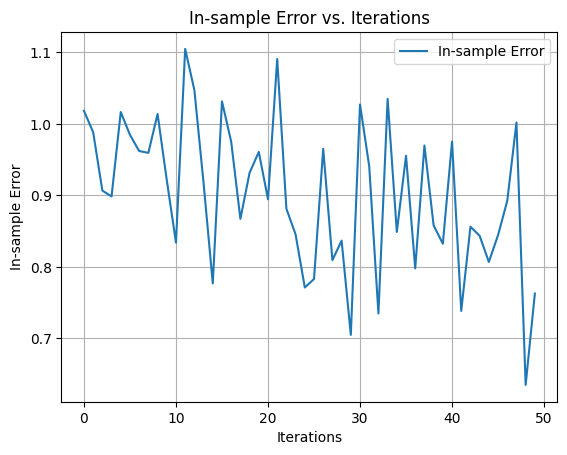

In [5]:
train_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipDigits.train")
unique_labels = np.unique(train_data[:, 0])
images = train_data[:, 1:]
dimension = int(np.sqrt(images.shape[1]))

dimensions = [dimension*dimension, 128, len(unique_labels)]
epochs = 50

# Train the network
Ein, trained_weights = sgd(train_data, dimensions, epochs)

#Plot Ein(w) versus iteration for the experiment.
plt.plot(range(epochs), Ein, label='In-sample Error')
plt.xlabel('Iterations')
plt.ylabel('In-sample Error')
plt.title('In-sample Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

0.0
8.0
9.0
8.0
4.0
6.0
6.0
2.0
6.0
1.0
6.0
9.0
4.0
1.0
9.0
4.0
0.0
0.0
0.0
0.0
9.0
9.0
2.0
4.0
7.0
5.0
1.0
1.0
9.0
0.0
1.0
8.0
0.0
5.0
3.0
8.0
2.0
1.0
4.0
2.0
6.0
0.0
8.0
0.0
3.0
4.0
1.0
1.0
0.0
7.0
0.0
1.0
2.0
5.0
0.0
3.0
7.0
0.0
4.0
0.0
7.0
7.0
4.0
0.0
9.0
9.0
0.0
9.0
7.0
2.0
5.0
7.0
1.0
1.0
4.0
1.0
2.0
1.0
1.0
1.0
0.0
6.0
2.0
8.0
8.0
1.0
4.0
7.0
1.0
3.0
5.0
3.0
8.0
3.0
0.0
9.0
7.0
8.0
0.0
4.0


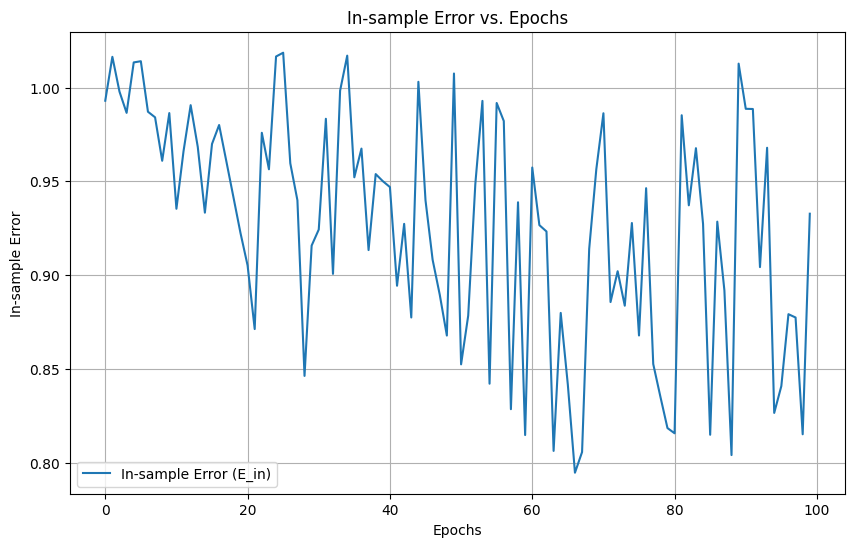

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

def tanh(x):
    """Hyperbolic tangent activation function."""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivative of the hyperbolic tangent function."""
    return 1 - np.tanh(x)**2

def initialize_weights(d):
    """Initializes weights with small random values, including bias."""
    np.random.seed(42)
    W1 = np.random.randn(d[1], d[0] + 1) * 0.01  # Include bias term in weight matrix
    W2 = np.random.randn(d[2], d[1] + 1) * 0.01
    return [W1, W2]

def forward(W, x):
    """Performs forward propagation through the neural network."""
    current_input = np.append(x, 1)  # Add bias for the input layer
    activations = [x]
    preactivations = []
    for w in W:
        z = np.dot(w, current_input)
        preactivations.append(z)
        a = tanh(z)
        current_input = np.append(a, 1)  # Add bias for the next layer input
        activations.append(a)
    return activations, preactivations

def backward(W, A, Z, y):
    """Performs backward propagation, computing gradients."""
    L = len(W)  # Number of weight matrices
    gradients = [None] * L
    delta = (A[-1] - y) * tanh_derivative(Z[-1])
    gradients[-1] = np.outer(delta, np.append(A[-2], 1))
    for l in reversed(range(L - 1)):
        delta = np.dot(W[l+1].T[:-1], delta) * tanh_derivative(Z[l])
        gradients[l] = np.outer(delta, np.append(A[l], 1))
    return gradients

def sgd(train_data, dimensions, epochs, learning_rate=0.01):
    """Stochastic Gradient Descent training algorithm."""
    W = initialize_weights(dimensions)
    Ein = []
    np.random.seed(42)

    for epoch in range(epochs):
        idx = np.random.randint(len(train_data))  # Random index for selecting a sample
        sample = train_data[idx]  # Random sample each epoch
        x = sample[:-1]  # All except last element as features
        y = np.zeros(dimensions[-1])
        y[int(sample[0])] = 1  # Use the first element as the label, correctly one-hot encode it

        A, Z = forward(W, x)
        gradients = backward(W, A, Z, y)
        for i in range(len(W)):
            W[i] -= learning_rate * gradients[i]

        total_error = np.sum((A[-1] - y) ** 2)  # Calculate squared error
        Ein.append(total_error)

    return Ein, W

def extract_features(data):
    """Extracts average intensity and symmetry as features from image data."""
    images = data[:, 1:]
    intensity = np.mean(images, axis=1)
    dimension = int(np.sqrt(images.shape[1]))
    images_reshaped = images.reshape(-1, dimension, dimension)
    flipped_images = np.flip(images_reshaped, axis=2)  # Flipping across the vertical axis
    symmetry = np.mean(np.abs(images_reshaped - flipped_images), axis=(1, 2))
    features = np.vstack((intensity, symmetry)).T
    labels = data[:, 0]  # Assuming first column is labels
    return np.hstack((labels[:, np.newaxis], features))

# Load training data
train_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipDigits.train")

# Extract features
train_data = extract_features(train_data)

# Neural network dimensions (adjust according to your data and needs)
dimensions = [2, 50, 10]  # 2 input features (intensity, symmetry), 50 hidden units, 10 output classes

# Training parameters
epochs = 100
learning_rate = 0.01

# Perform SGD training
Ein, trained_weights = sgd(train_data, dimensions, epochs, learning_rate)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), Ein, label='In-sample Error (E_in)')
plt.xlabel('Epochs')
plt.ylabel('In-sample Error')
plt.title('In-sample Error vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()
